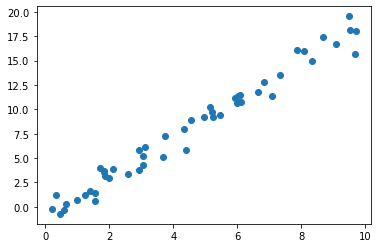

In [11]:
# 教師あり学習
import matplotlib.pyplot as plt
import numpy as np

# ランダム値のシードを設定(シードを設定すると必ず同じランダム値になる)
rng = np.random.RandomState(42)

# 0以上のランダム値
x = 10 * rng.rand(50)

# -1〜1のランダム値
y = 2 * x - 1 + rng.randn(50)

plt.scatter(x, y)

In [12]:
# モデルの作成
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
# データを特徴マトリクスと目的配列に配置する
X = x[:, np.newaxis]
X.shape

(50, 1)

In [16]:
# データをモデルに当てはめる
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
model.coef_

array([1.9776566])

In [19]:
model.intercept_

-0.9033107255311146

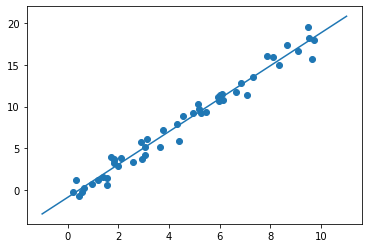

In [22]:
# 未知のデータのラベルを予測
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

plt.scatter(x, y)
plt.plot(xfit, yfit)

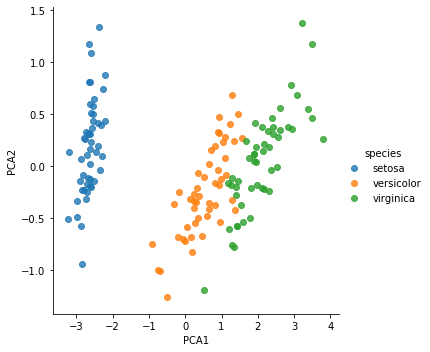

In [26]:
# 教師なし学習
from sklearn.decomposition import PCA # 主成分分析
import seaborn as sns

iris = sns.load_dataset('iris')
X_iris = iris.drop('species', axis=1)

model = PCA(n_components=2)
model.fit(X_iris)
X_2D = model.transform(X_iris)

iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False)

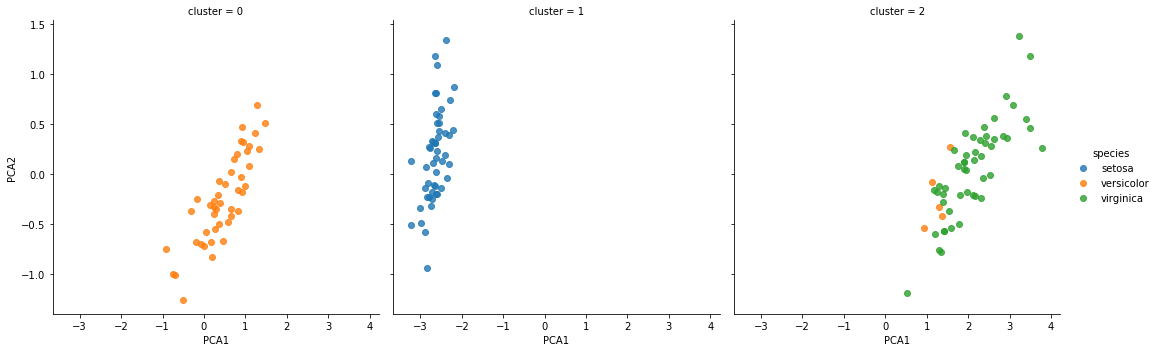

In [28]:
# 教師なし学習
from sklearn.mixture import GaussianMixture # ガウス混合モデル
model = GaussianMixture(n_components=3, covariance_type='full')
model.fit(X_iris)
y_gmm = model.predict(X_iris)

iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False)

In [32]:
# 誤ったモデル検証方法
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)
y_model = model.predict(X)

accuracy_score(y, y_model)

1.0

In [34]:
# 正しいモデル検証方法：ホールドアウトセット
from sklearn.model_selection import train_test_split

X1, X2, y1, y2 = train_test_split(X, y, random_state=0, test_size=0.5)

model.fit(X1, y1)
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9066666666666666

In [35]:
# 正しいモデル検証方法：交差検証

y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

In [36]:
# 5分割交差検証
from sklearn.model_selection import cross_val_score

cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [38]:
# leave-one-out交差検証
from sklearn.model_selection import LeaveOneOut

scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores
scores.mean()

0.96

In [39]:
# カテゴリ特徴量
from sklearn.feature_extraction import DictVectorizer

data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'},
]
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [40]:
# 特徴名
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

In [44]:
# テキスト特徴量
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

sample = ['テキスト 特徴量',
          'カテゴリ 特徴量',
          '画像 特徴量']
vec = CountVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,カテゴリ,テキスト,特徴量,画像
0,0,1,1,0
1,1,0,1,0
2,0,0,1,1


In [45]:
# 索引語頻度逆文書頻度(TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,カテゴリ,テキスト,特徴量,画像
0,0.000000,0.861037,0.508542,0.000000
1,0.861037,0.000000,0.508542,0.000000
2,0.000000,0.000000,0.508542,0.861037


In [46]:
# ナイーブベイズによるテキストの分類
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [49]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
train =fetch_20newsgroups(subset='train', categories=categories)
test =fetch_20newsgroups(subset='test', categories=categories)

In [50]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



Text(91.68, 0.5, 'predicted label')

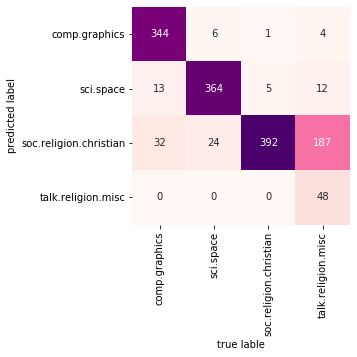

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target)
labels = model.predict(test.data)

mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, 
            square=True, 
            annot=True, 
            fmt='d', 
            cbar=False, 
            xticklabels=train.target_names, 
            yticklabels=train.target_names,
            cmap='RdPu')
plt.xlabel('true lable')
plt.ylabel('predicted label')

In [58]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [59]:
predict_category('sending a payload to the ISS')

'sci.space'

In [60]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [61]:
predict_category('ナイーブベイズ')

'soc.religion.christian'

In [67]:
train.target_names

['comp.graphics', 'sci.space', 'soc.religion.christian', 'talk.religion.misc']

<ErrorbarContainer object of 3 artists>

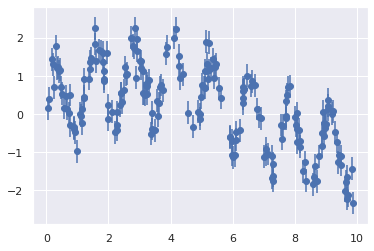

In [70]:
# ランダムフォレスト回帰
from sklearn.ensemble import RandomForestRegressor

rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))
    
    return slow_oscillation + fast_oscillation + noise

y = model(x)
sns.set()
plt.errorbar(x, y, 0.3, fmt='o')

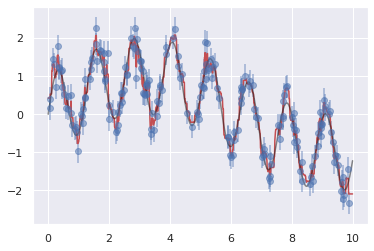

In [71]:
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r')
plt.plot(xfit, ytrue, '-k', alpha=0.5)

/opt/conda/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/conda/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


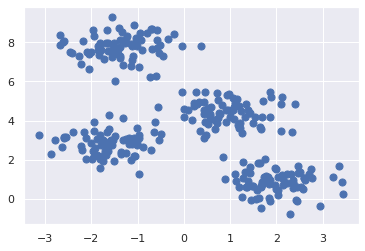

In [1]:
# k平均法

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

sns.set()

# データセット
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

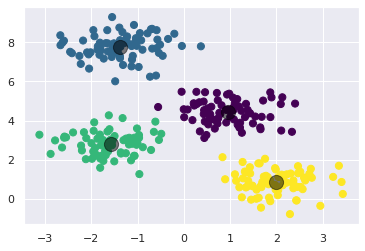

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)